# Image retrieval using deep features

In [112]:
import turicreate
turicreate.visualization._plot._target = 'auto'
get_ipython().__class__.__name__ = "ZMQInteractiveShell"

# Load some CIFAR-10 images

In [41]:
image_data_train = turicreate.SFrame('image_train_data/')
image_data_test = turicreate.SFrame('image_test_data/')

# Compute deep features from our images

In [ ]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [42]:
image_data_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Create a nearest neighbors model to retrieve images from deep features

In [43]:
knn_model = turicreate.nearest_neighbors.create(image_data_train,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [44]:
cat = image_data_train[18:19]

In [45]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 18.496ms     |

| Done         |         | 100         | 148.133ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [46]:
def get_images_from_ids(query_result):
    return image_data_train.filter_by(query_result['reference_label'],'id')

In [47]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 18.187ms     |

| Done         |         | 100         | 129.03ms     |

+--------------+---------+-------------+--------------+

In [48]:
cat_neighbors['label']

dtype: str
Rows: 5
['cat', 'cat', 'cat', 'cat', 'cat']

# Find images similar to a car

In [52]:
car = image_data_train[8:9]

In [53]:
car['label']

dtype: str
Rows: 1
['automobile']

In [54]:
get_images_from_ids(knn_model.query(car))['label']

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 10.326ms     |

| Done         |         | 100         | 132.954ms    |

+--------------+---------+-------------+--------------+

dtype: str
Rows: 5
['automobile', 'automobile', 'automobile', 'automobile', 'automobile']

# Create a lambda function to find and show nearest neighbors to an image

In [55]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data_train[i:i+1]))['label']

In [27]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 5.036ms      |

| Done         |         | 100         | 127.09ms     |

+--------------+---------+-------------+--------------+

dtype: str
Rows: 5
['automobile', 'automobile', 'automobile', 'automobile', 'automobile']

In [28]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 6.224ms      |

| Done         |         | 100         | 116.984ms    |

+--------------+---------+-------------+--------------+

dtype: str
Rows: 5
['automobile', 'automobile', 'automobile', 'automobile', 'automobile']

In [29]:
show_neighbors(500)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 6.789ms      |

| Done         |         | 100         | 115.815ms    |

+--------------+---------+-------------+--------------+

dtype: str
Rows: 5
['bird', 'bird', 'dog', 'bird', 'dog']

In [56]:
sketch = turicreate.Sketch(image_data_train['label'])

In [31]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [57]:
train_data_cat = image_data_train[image_data_train['label']=='cat']
train_data_dog = image_data_train[image_data_train['label']=='dog']
train_data_automobile = image_data_train[image_data_train['label']=='automobile']
train_data_bird = image_data_train[image_data_train['label']=='bird']

In [58]:
train_data_dog.head()

id,image,label,deep_features,image_array
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
177,Height: 32 Width: 32,dog,"[0.0, 1.4596567153930664,0.0, 0.4229923486709595, ...","[55.0, 75.0, 42.0, 51.0,76.0, 37.0, 57.0, 83.0, ..."
424,Height: 32 Width: 32,dog,"[0.9423996806144714, 0.0,0.22035276889801025, ...","[60.0, 35.0, 18.0, 63.0,49.0, 38.0, 66.0, 56.0, ..."
462,Height: 32 Width: 32,dog,"[1.4346256256103516, 0.0,0.0, 0.0, 0.0, 0.0, ...","[86.0, 69.0, 75.0, 57.0,41.0, 48.0, 46.0, 35.0, ..."
542,Height: 32 Width: 32,dog,"[0.4515470862388611, 0.0,0.0, 0.0, 0.0, 0.0, ...","[196.0, 174.0, 113.0,140.0, 117.0, 65.0, 8 ..."
573,Height: 32 Width: 32,dog,"[0.5923609733581543, 0.0,0.0, 0.0, 0.0, 0.0, ...","[153.0, 103.0, 52.0,151.0, 102.0, 49.0, ..."
851,Height: 32 Width: 32,dog,"[0.690123438835144, 0.0,0.0, 0.0, ...","[39.0, 6.0, 4.0, 53.0,23.0, 24.0, 57.0, 37.0, ..."
919,Height: 32 Width: 32,dog,"[0.0,0.17755866050720215, ...","[29.0, 43.0, 4.0, 24.0,35.0, 6.0, 24.0, 37.0, ..."
1172,Height: 32 Width: 32,dog,"[0.517601490020752, 0.0,1.9641833305358887, 0.0, ...","[182.0, 180.0, 197.0,196.0, 192.0, 209.0, ..."


In [ ]:
dog_model = turicreate.nearest_neighbors.create(train_data_dog,
                                               features = ['deep_features'],
                                               label = 'id')
cat_model = turicreate.nearest_neighbors.create(train_data_cat,
                                               features = ['deep_features'],
                                               label = 'id')
auto_model = turicreate.nearest_neighbors.create(train_data_automobile,
                                               features = ['deep_features'],
                                               label = 'id')
bird_model = turicreate.nearest_neighbors.create(train_data_bird,
                                               features = ['deep_features'],
                                               label = 'id')

In [137]:
def show_nearest_neighbors(i, knn_model):
    return get_images_from_ids(knn_model.query(image_data_test[i:i+1])[0])['image']

In [116]:
cat_model.query(image_data_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 107.027ms    |

| Done         |         | 100         | 216.167ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 51.081ms     |

| Done         |         | 100         | 132.093ms    |

+--------------+---------+-------------+--------------+

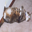

In [138]:
img=show_nearest_neighbors(0, cat_model)
img[0]


In [139]:
img2=dog_model.query(image_data_test[0:1])
img2[0]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 12.828ms     |

| Done         |         | 100         | 116.03ms     |

+--------------+---------+-------------+--------------+

{'query_label': 0,
 'reference_label': 16976,
 'distance': 37.464262878423774,
 'rank': 1}

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.367ms     |

| Done         |         | 100         | 58.724ms     |

+--------------+---------+-------------+--------------+

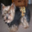

In [141]:
show_nearest_neighbors(0, dog_model)[0]

In [68]:
cat_model.query(image_data_test[0:1])["distance"].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.38ms       |

| Done         |         | 100         | 42.324ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

In [70]:
dog_model.query(image_data_test[0:1])["distance"].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 11.683ms     |

| Done         |         | 100         | 50.328ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

In [72]:
test_data_cat = image_data_test[image_data_test['label']=='cat']
test_data_dog = image_data_test[image_data_test['label']=='dog']
test_data_automobile = image_data_test[image_data_test['label']=='automobile']
test_data_bird = image_data_test[image_data_test['label']=='bird']

In [ ]:
cat_dog_nn = cat_model.query(test_data_dog, k=1)
auto_dog_nn = auto_model.query(test_data_dog, k=1)
bird_dog_nn = bird_model.query(test_data_dog, k=1)
dog_dog_nn = dog_model.query(test_data_dog, k=1)

In [75]:
cat_dog_nn 

query_label,reference_label,distance,rank
0,33,36.419607706754384,1
1,30606,38.83532688735542,1
2,5545,36.97634108541546,1
3,19631,34.575007291446106,1
4,7493,34.77882479101661,1
5,47044,35.11715782924591,1
6,13918,40.60958309132649,1
7,10981,39.90368673062214,1
8,45456,38.067470016821176,1
9,44673,42.72587329506032,1


In [77]:
auto_dog_nn 

query_label,reference_label,distance,rank
0,33859,41.95797614571203,1
1,2046,46.00213318067788,1
2,19594,42.946229069238804,1
3,11000,41.68660600484793,1
4,19594,39.22696649347584,1
5,49314,40.58451176980721,1
6,40822,45.10673529610854,1
7,44997,41.32211409739762,1
8,33859,41.82446549950164,1
9,33859,45.497692940110376,1


In [78]:
bird_dog_nn

query_label,reference_label,distance,rank
0,44658,41.75386473035126,1
1,9215,41.3382958924861,1
2,36675,38.615759085289056,1
3,12582,37.08922699538214,1
4,36122,38.27228869398105,1
5,8736,39.146208923590486,1
6,38991,40.523040105962316,1
7,44177,38.19479183926956,1
8,4549,40.156713166131446,1
9,40225,45.55979626027668,1


In [79]:
dog_dog_nn

query_label,reference_label,distance,rank
0,49803,33.47735903726335,1
1,5755,32.84584956840554,1
2,20715,35.03970731890584,1
3,13387,33.90103276968193,1
4,12089,37.484925090925636,1
5,6094,34.94516534398124,1
6,3431,39.095727834463545,1
7,6184,37.76961310322034,1
8,2167,35.10891446032838,1
9,7776,43.242283258453455,1


In [80]:
dog_distances = turicreate.SFrame({   'dog_dog': dog_dog_nn['distance'],
                                    'cat_dog': cat_dog_nn['distance'],
                                    'automobile_dog': auto_dog_nn['distance'],
                                    'bird_dog': bird_dog_nn['distance']
                                })
dog_distances.head()

automobile_dog,bird_dog,cat_dog,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [81]:
row = dog_distances[0]


In [82]:
row

{'automobile_dog': 41.95797614571203,
 'bird_dog': 41.75386473035126,
 'cat_dog': 36.419607706754384,
 'dog_dog': 33.47735903726335}

In [84]:
def is_dog_correct(row):
    if min(row['dog_dog'],row['automobile_dog'],row['bird_dog'],row['cat_dog'])==row['dog_dog']:
        return 1
    else:
        return 0

In [85]:
correctness = dog_distances.apply(is_dog_correct)

In [87]:
correctness.sum()

678

In [88]:
correctness.mean()

0.6779999999999999